<a href="https://colab.research.google.com/github/SRI1099/sbiruduk_Machinelearning/blob/main/Assignement_2_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# lOADING TEH DATA SET

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
train_labels[0]

1

In [8]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [10]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # First layer with 32 units and tanh activation function
    layers.Dense(32, activation="tanh"),
    # second layer with 32 units and tanh activation function
    layers.Dense(32, activation="tanh"),
    # third layer with 32 units and tanh activation function
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

###Compiling the model

In [14]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

###Validate the apprach

In [15]:

# Splitting the training data:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
# Splitting the labels:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
# planned to train with 20 epoch and a batch size of 256

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.7340 - loss: 0.5085 - val_accuracy: 0.8033 - val_loss: 0.4435
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9156 - loss: 0.2155 - val_accuracy: 0.8882 - val_loss: 0.2771
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9450 - loss: 0.1471 - val_accuracy: 0.8796 - val_loss: 0.3082
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9604 - loss: 0.1102 - val_accuracy: 0.8792 - val_loss: 0.3359
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9725 - loss: 0.0788 - val_accuracy: 0.8751 - val_loss: 0.3855
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9778 - loss: 0.0673 - val_accuracy: 0.8739 - val_loss: 0.4241
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9850 - loss: 0.0452 - val_accuracy: 0.8702 - val_loss: 0.4823
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9877 - loss: 0.0369 - val_accuracy: 0.8565 - v

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

###Plotting training and validation loss

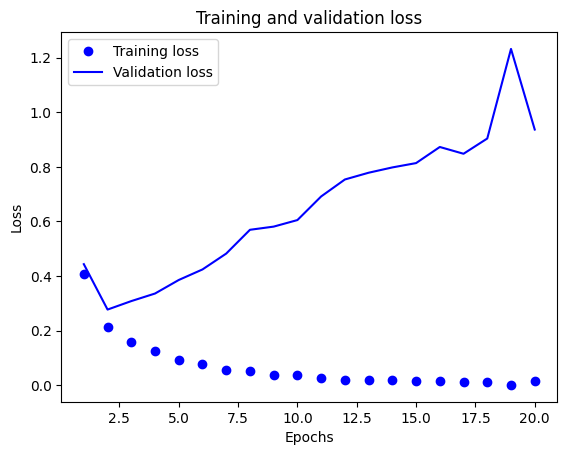

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

###Plotting training and vlaidation accuracy

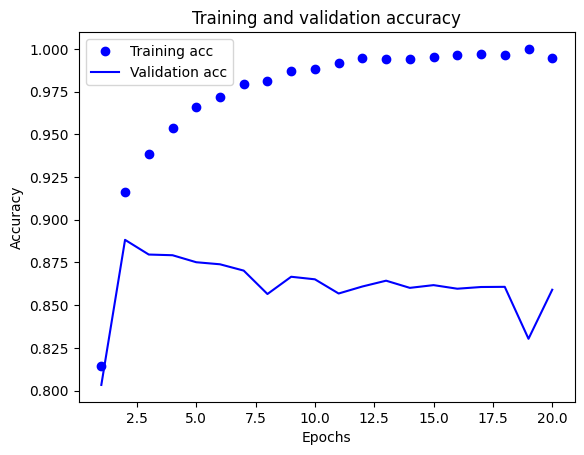

In [19]:
 plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

###Retraining teh model from scratch

In [20]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7133 - loss: 0.5707
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8992 - loss: 0.2923
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9242 - loss: 0.2173
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9367 - loss: 0.1789
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8819 - loss: 0.2931


In [21]:
results

[0.29047611355781555, 0.8846399784088135]

**Test Loss** is arround 0.29 which ir relatively low in case of binary classification, which suggests us that the model is performing well in terms of minimizing the difference between **predicted probabilities and** **actual labels**.

**Test Accuracy** is close to 88.5 percent which is a good result.

the model is also maintaing a low error rate in terms of predicted probability.



###Model with Regularization


Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.5127 - loss: 3.9890 - val_accuracy: 0.5629 - val_loss: 1.7562
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5410 - loss: 1.8512 - val_accuracy: 0.5939 - val_loss: 1.1949
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5870 - loss: 1.1835 - val_accuracy: 0.7134 - val_loss: 0.8847
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6945 - loss: 0.8456 - val_accuracy: 0.8240 - val_loss: 0.6586
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8389 - loss: 0.6119 - val_accuracy: 0.8665 - val_loss: 0.4516
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9027 - loss: 0.4116 - val_accuracy: 0.8784 - val_loss: 0.3008
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9323 - loss: 0.2616 - val_accuracy: 0.8773 - val_loss: 0.2062
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9442 - loss: 0.1709 - val_accuracy: 0.8818 - val

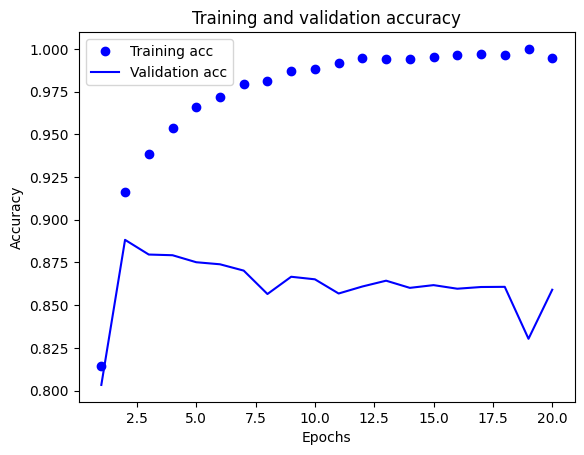

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8495 - loss: 0.1268


[0.12530264258384705, 0.8514400124549866]

In [22]:
# Libraries required for setting up an environment

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import regularizers

# Neural network implementation using 3 layered approach with a single dropout layer
model = keras.Sequential()
model.add(Dense(32,activation='tanh'))
model.add(Dropout(0.5)) # Dropout with 50% rate
model.add(Dense(32,activation='tanh',kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5)) # Dropout with 50% rate
model.add(Dense(32,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Here for compilation we used optimizer "adagrad", mean squared error loss and accuracy metrics

model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])

# splitting the data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train a neural network
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

# plotting the Training and Validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Evaluating the results
results = model.evaluate(x_test, y_test)
results

####Results after regularization

**Test Loss** 0.125

**Before regularization** the model was not **minimizing the error effectively**. After regularization the model is making refined predictions.

**Test Accuracy** 85.14

**Before Regularization** models accuracy was high indicating model correctly classified the test data, accuracy slightly dropped after regularization.

The model sacrificed some accuracy for a much lower loss, meaning it is more likely to generalize well to unseen data.



###Initial Model

A simple neural network with Three hidden layer was built using the Tanh activation function and rmsprop optimizer with mse loss. The model was trained over 20 epochs, with performance tracked through plots showing both training and validation loss and accuracy.

###Regularized Model

To enhance the model and avoid overfitting, L1 and L2 regularization and  dropout layers were added. The optimizer was switched to Adam, and binary cross-entropy was used as the loss function, which is better suited for binary classification tasks.
